In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import warnings as w
w.filterwarnings('ignore')


In [2]:
raw_data = pd.read_csv(r'D:\Upgrad\MLR Assignment\day.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
x_vars = raw_data.drop(['casual','registered','cnt'], axis = 1).columns

In [6]:
y_vars = ['casual','registered','cnt']

<Figure size 1800x864 with 0 Axes>

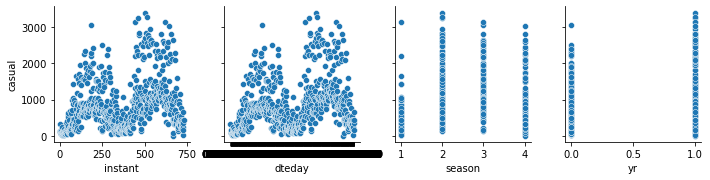

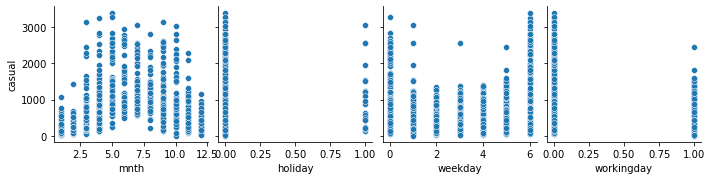

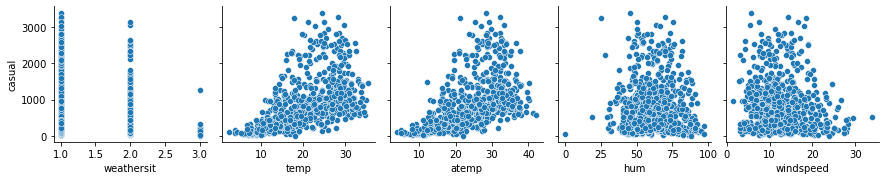

In [7]:
plt.figure(figsize = (25,12))
sns.pairplot(x_vars = x_vars[:4], y_vars = y_vars[0], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[4:8], y_vars = y_vars[0], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[8:], y_vars = y_vars[0], data = raw_data,diag_kind = None)


<Figure size 1800x864 with 0 Axes>

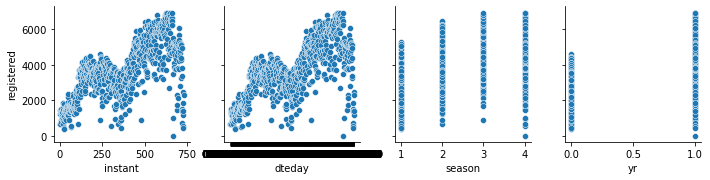

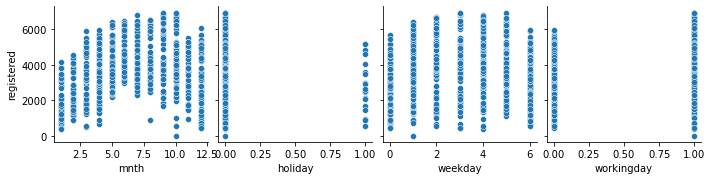

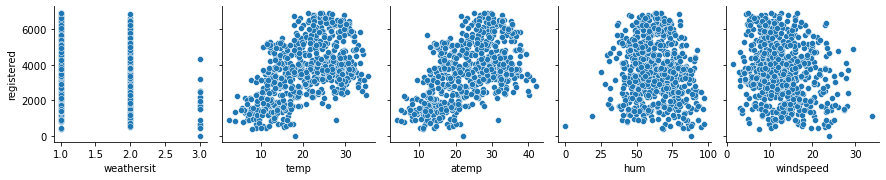

In [8]:
plt.figure(figsize = (25,12))
sns.pairplot(x_vars = x_vars[:4], y_vars = y_vars[1], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[4:8], y_vars = y_vars[1], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[8:], y_vars = y_vars[1], data = raw_data,diag_kind = None)

<Figure size 1800x864 with 0 Axes>

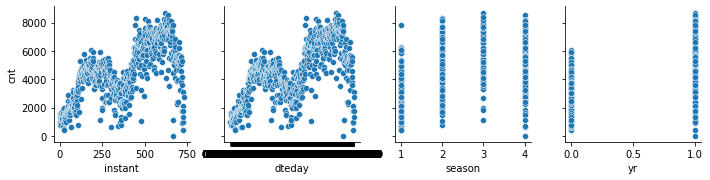

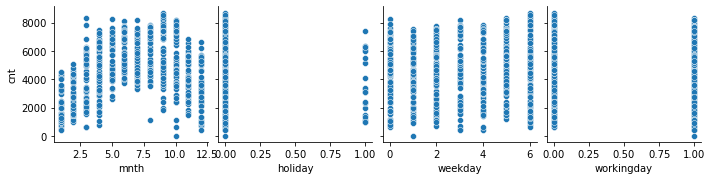

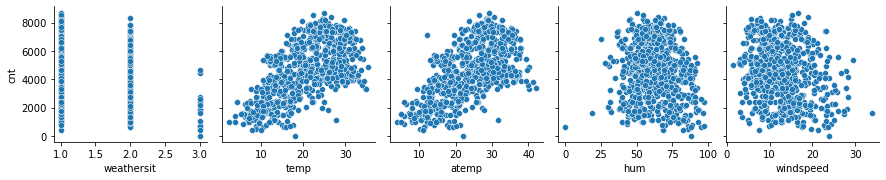

In [9]:
plt.figure(figsize = (25,12))
sns.pairplot(x_vars = x_vars[:4], y_vars = y_vars[2], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[4:8], y_vars = y_vars[2], data = raw_data,diag_kind = None)
sns.pairplot(x_vars = x_vars[8:], y_vars = y_vars[2], data = raw_data,diag_kind = None)

Observations - 
- temp and atemp seem to follow similar trends and looks like they are proportional, so higher numbers for warmer temperatures
- holiday numbers for casuals are higher while non-holiday/weekday numbers for registered are higher
- There are very low to no numbers for low humidity implying, people avoid bike riding on dry conditions
- There are no rentals for heavy rain for obvious reasons
- People prefer fall and summer over winter and spring for driving 

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

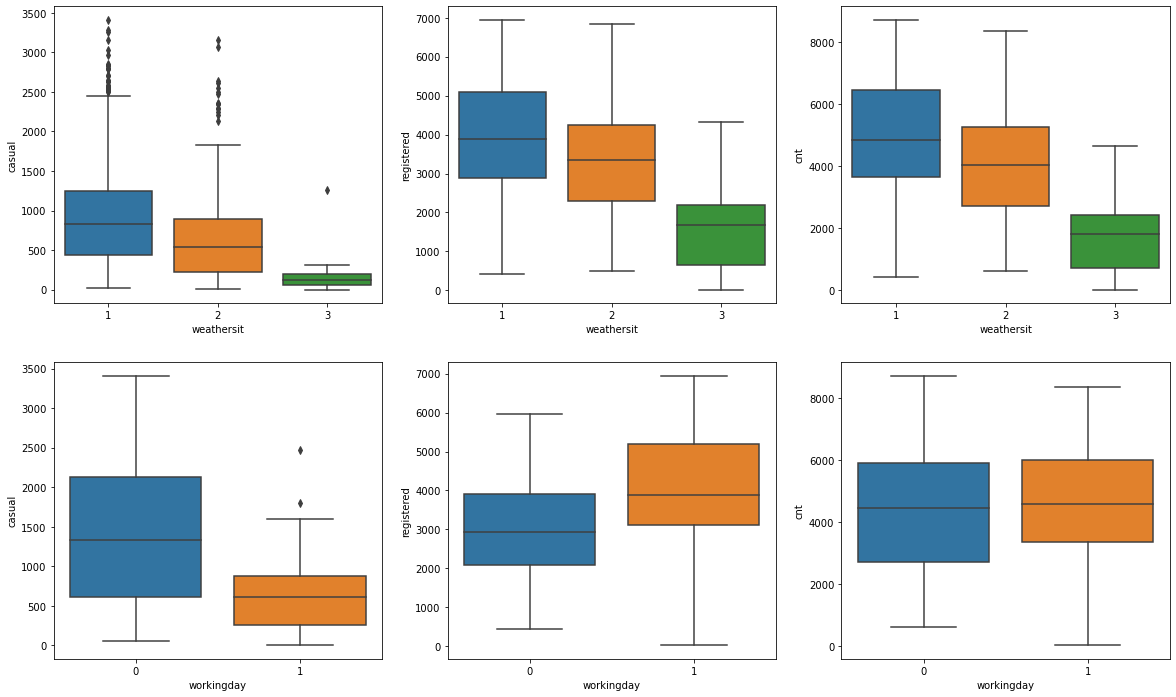

In [10]:


plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot('weathersit','casual',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,2)
sns.boxplot('weathersit','registered',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,3)
sns.boxplot('weathersit','cnt',data = raw_data)



#plt.figure(figsize = (20,12))
plt.subplot(2,3,4)
sns.boxplot('workingday','casual',data = raw_data)


#plt.figure(figsize = (20,12))
plt.subplot(2,3,5)
sns.boxplot('workingday','registered',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,6)
sns.boxplot('workingday','cnt',data = raw_data)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

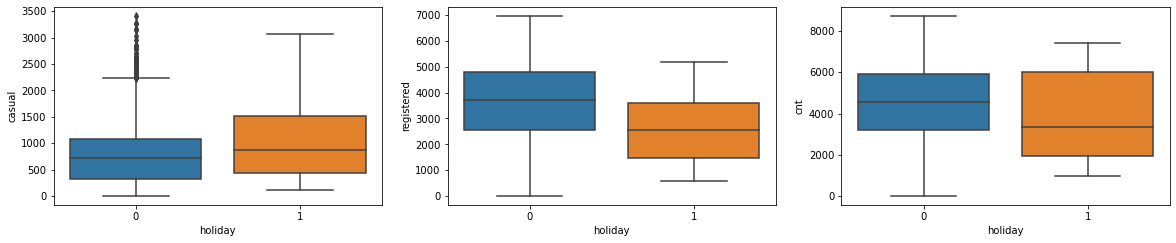

In [11]:
plt.figure(figsize = (20,8))
plt.subplot(2,3,1)
sns.boxplot('holiday','casual',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,2)
sns.boxplot('holiday','registered',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,3)
sns.boxplot('holiday','cnt',data = raw_data)



<AxesSubplot:xlabel='weekday', ylabel='cnt'>

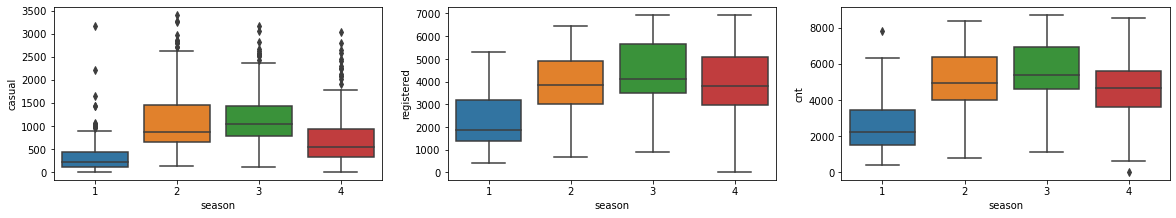

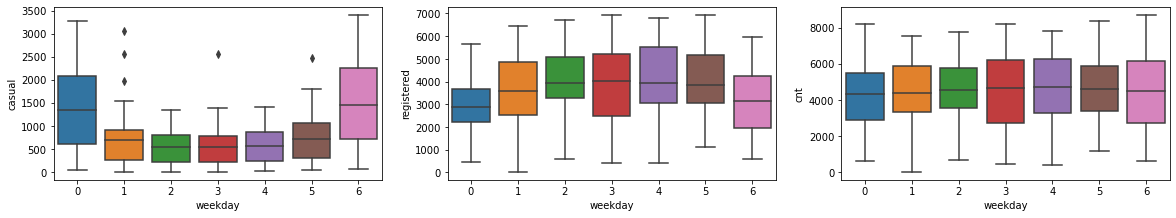

In [12]:

plt.figure(figsize = (20,7))
plt.subplot(2,3,1)
sns.boxplot('season','casual',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,2)
sns.boxplot('season','registered',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,3)
sns.boxplot('season','cnt',data = raw_data)


plt.figure(figsize = (20,7))
plt.subplot(2,3,4)
sns.boxplot('weekday','casual',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,5)
sns.boxplot('weekday','registered',data = raw_data)

#plt.figure(figsize = (20,12))
plt.subplot(2,3,6)
sns.boxplot('weekday','cnt',data = raw_data)



In [13]:
raw_data['weathersit_mod'] = raw_data[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'}))
raw_data['season_mod'] = raw_data[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
raw_data['weekday_mod'] = raw_data[['weekday']].apply(lambda x : x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))

In [14]:
raw_data.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_mod,season_mod,weekday_mod
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Mist,spring,Sat
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Mist,spring,Sun
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Clear,spring,Mon
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Clear,spring,Tue
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Clear,spring,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2018,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808,Clear,summer,Wed
96,97,07-04-2018,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141,Clear,summer,Thu
97,98,08-04-2018,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471,Mist,summer,Fri
98,99,09-04-2018,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455,Mist,summer,Sat


## Dummy data

In [15]:
status_weather = pd.get_dummies(raw_data['weathersit_mod'])
status_season = pd.get_dummies(raw_data['season_mod'],drop_first = True)
status_weekday = pd.get_dummies(raw_data['weekday_mod'],drop_first = True)

In [16]:
status_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
raw_data_mod = pd.concat([raw_data,status_weather,status_season,status_weekday],axis = 1)

In [18]:
raw_data_mod_final = raw_data_mod.drop(['weathersit','season','weathersit_mod','season_mod','weekday','weekday_mod'],axis = 1)

In [19]:
raw_data_mod_final

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,Mist,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,1,1,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,1,1,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,1,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,1,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,12,0,1,10.420847,11.33210,65.2917,23.458911,...,1,1,0,0,0,0,0,1,0,0
726,727,28-12-2019,1,12,0,1,10.386653,12.75230,59.0000,10.416557,...,1,1,0,0,0,0,0,0,0,0
727,728,29-12-2019,1,12,0,0,10.386653,12.12000,75.2917,8.333661,...,1,1,0,0,0,1,0,0,0,0
728,729,30-12-2019,1,12,0,0,10.489153,11.58500,48.3333,23.500518,...,0,1,0,0,0,0,1,0,0,0


In [20]:
#scaling not required as data is well scaled already

In [21]:
df_train, df_test = train_test_split(raw_data_mod_final)

In [22]:
df_train.shape, df_test.shape

((547, 25), (183, 25))

<AxesSubplot:>

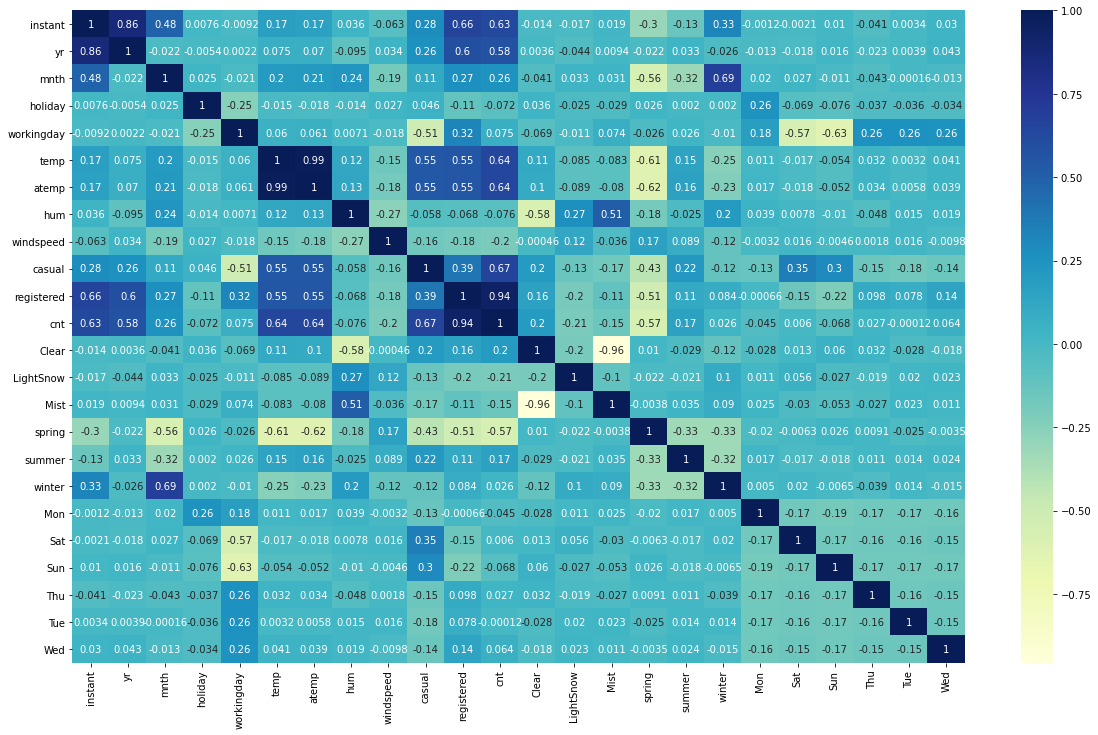

In [23]:
plt.figure(figsize = (20,12))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
#atemp is very similar to temp 

Observations - 
- Most of the users are registered users with 94% correlation 
- All cnt, registered and casual numbers are directly proportional with temperatures, favoring warmer conditions

## Model Building 

In [24]:
y_train_cnt = df_train[['cnt']]
y_test_cnt = df_test[['cnt']]

In [25]:
from sklearn.feature_selection import RFE

In [26]:
lm = LinearRegression()

In [27]:
#x_train_sk = df_train.drop(['registered','cnt','casual','dteday','temp','workingday','summer','Clear','LightSnow','Mist','mnth','instant','hum','fall','winter'],axis = 1)#,'dteday','instant','atemp','hum','season','mnth','windspeed','weathersit'], axis = 1)
#x_test_sk = df_test.drop(['registered','cnt','casual','dteday','temp','workingday','summer','Clear','LightSnow','Mist','mnth','instant','hum','fall','winter'],axis = 1)
x_train_sk = df_train.drop(['registered','cnt','casual','dteday','Tue','Thu','holiday','Clear','workingday','summer','Sat','temp'],axis = 1)#,'temp','workingday','summer','Clear','LightSnow','Mist','mnth','instant','hum','fall','winter'],axis = 1)#,'dteday','instant','atemp','hum','season','mnth','windspeed','weathersit'], axis = 1)
x_test_sk = df_test.drop(['registered','cnt','casual','dteday','Tue','Thu','holiday','Clear','workingday','summer','Sat','temp'],axis = 1)#,'temp','workingday','summer','Clear','LightSnow','Mist','mnth','instant','hum','fall','winter'],axis = 1)

#dropping workingday as it was redundant with weekday and at the same time came out to be insignificant on p-value
#dropping temp as it was redundant with atemp and at the same time came out to be insignificant on p-value
#dteday could not be processed due to being date/string

In [28]:
lm.fit(x_train_sk,y_train_cnt)

LinearRegression()

In [29]:
rfe = RFE(lm,8)
#taking 10 variables as otherwise the VIF was significantly higher

In [30]:
rfe = rfe.fit(x_train_sk,y_train_cnt)

In [31]:
list(zip(x_train_sk.columns,rfe.support_,rfe.ranking_))

[('instant', False, 6),
 ('yr', True, 1),
 ('mnth', False, 4),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 3),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sun', True, 1),
 ('Wed', False, 2)]

In [32]:
x_train_sk.columns[rfe.support_]

Index(['yr', 'atemp', 'LightSnow', 'Mist', 'spring', 'winter', 'Mon', 'Sun'], dtype='object')

In [33]:
x_train_rfe = sm.add_constant(x_train_sk[x_train_sk.columns[rfe.support_]])

In [34]:
lr_rfe = sm.OLS(y_train_cnt,x_train_rfe)
lr_rfe_model = lr_rfe.fit()

In [35]:
lr_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     274.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.81e-184
Time:                        18:19:58   Log-Likelihood:                -4466.9
No. Observations:                 547   AIC:                             8952.
Df Residuals:                     538   BIC:                             8990.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1690.7533    220.894      7.654      0.000    1256.833    2124.673
yr          2070.2382     73.752     28.070      0.000    1925.360    2215.116
atemp         98.8946      6.976     14.176      0.000      85.191     112.599
LightSnow  -2372.4863    266.160     -8.914      0.000   -2895.327   -1849.645
Mist        -590.2325     79.349     -7.438      0.000    -746.105    -434.360
spring     -1192.1622    136.868     -8.710      0.000   -1461.023    -923.302
winter       355.1054    110.668      3.209      0.001     137.711     572.499
Mon         -313.4270    103.698     -3.022      0.003    -517.130    -109.724
Sun         -367.7441    102.118     -3.601      0.000    -568.343    -167.145
==============================================================================
Omnibus:                       69.516   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.883
Skew:                          -0.691   Prob(JB):                     8.58e-35
Kurtosis:                       5.230   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#VIF
vif = pd.DataFrame()
x_train_vif = x_train_rfe.drop('const',axis = 1)
vif['features'] = x_train_vif.columns
vif['vif'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending= False)
vif

,features,vif
1,atemp,2.55
0,yr,2.05
3,Mist,1.49
5,winter,1.33
4,spring,1.25
6,Mon,1.22
7,Sun,1.22
2,LightSnow,1.04


## Evaluating Model

In [37]:
y_train_pred = lr_rfe_model.predict(x_train_rfe)

In [38]:
r2_score(y_train_cnt,y_train_pred)

0.8029971558046652

In [39]:
x_test_rfe = sm.add_constant(x_test_sk[x_train_sk.columns[rfe.support_]])

In [40]:
y_test_pred = lr_rfe_model.predict(x_test_rfe)

In [41]:
r2_score(y_test_cnt,y_test_pred)

0.8344619250042509

<AxesSubplot:ylabel='Density'>

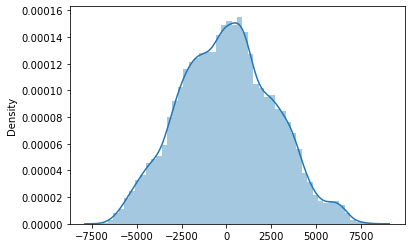

In [42]:
sns.distplot(y_test_cnt.values - y_test_pred.values)

## Results

- The model does a good job at predicting the values for number of users
- The model explains a good amount of variance with adj r-square at ~80%
- All selected variables - season, yr, holiday, weathersit, atemp, weekday and windspeed - are significant 